
# Movie Recommendations with Document Similarity

**Introduction：**

This project builds a content-based movie recommendation system using text similarity techniques. The system analyzes movie descriptions and finds similar movies based on their textual features.

Recommender systems are one of the popular and most adopted applications of machine learning. They are typically used to recommend entities to users and these entites can be anything like products, movies, services and so on.

Typically recommender systems can be implemented in three ways:

- Simple Rule-based Recommenders: Typically based on specific global metrics and thresholds like movie popularity, global ratings etc.
- Content-based Recommenders: This is based on providing similar entities based on a specific entity of interest. Content metadata can be used here like movie descriptions, genre, cast, director and so on
- Collaborative filtering Recommenders: Here we don't need metadata but we try to predict recommendations and ratings based on past ratings of different users and specific items.

We will be building a movie recommendation system here where based on data\metadata pertaining to different movies, we try and recommend similar movies of interest!

![](https://i.imgur.com/c7Go7d3.png)

Since our focus in not really recommendation engines but NLP, we will be leveraging the text-based metadata for each movie to try and recommend similar movies based on specific movies of interest. This falls under content-based recommenders.

# Install Dependencies

**这些library都是干啥？**

- textsearch: efficiently searching for patterns in text using regular expressions.
   - Pattern Matching: It allows for matching strings against regular expressions
   - Search and Replace: You can find occurrences of patterns and replace them with other text, which is handy for cleaning or transforming text data.

-  contractions: which is useful for expanding contractions in text (e.g., changing "don't" to "do not").

- nltk: The Natural Language Toolkit
   - Text Processing Libraries
   - Corpora and Lexical Resources
   - Text Classification
   - Text Mining
   - Visualization

- Punkt: Punkt is a pre-trained tokenizer provided by the NLTK library, specifically designed for splitting text into sentences and words.

- Stopwords: a predefined list of stopwords for various languages.

In [10]:
# install
!pip install textsearch
!pip install contractions
import nltk
nltk.download('punkt')
nltk.download('stopwords')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 9.0 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## 0. Load and View Data

In [2]:
import pandas as pd

df = pd.read_csv('https://github.com/dipanjanS/nlp_workshop_dhs18/raw/master/Unit%2010%20-%20Project%208%20-%20Movie%20Recommendations%20with%20Document%20Similarity/tmdb_5000_movies.csv.gz', compression='gzip')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [3]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


#### Create a new col called 'description'

Concatenate the `tagline` and `overview` fields and create a new column called description in the dataframe

In [4]:
df = df[['title', 'tagline', 'overview', 'popularity']]
df['tagline'] = df['tagline'].fillna('')
df.head()

<ipython-input-4-9df3e6fad771>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tagline'] = df['tagline'].fillna('')


,title,tagline,overview,popularity
0,Avatar,Enter the World of Pandora.,"In the 22nd century, a paraplegic Marine is di...",150.437577
1,Pirates of the Caribbean: At World's End,"At the end of the world, the adventure begins.","Captain Barbossa, long believed to be dead, ha...",139.082615
2,Spectre,A Plan No One Escapes,A cryptic message from Bond’s past sends him o...,107.376788
3,The Dark Knight Rises,The Legend Ends,Following the death of District Attorney Harve...,112.312950
4,John Carter,"Lost in our world, found in another.","John Carter is a war-weary, former military ca...",43.926995


In [18]:
df['description'] = df['tagline'] + df['overview']
df.head()

,title,tagline,overview,popularity,description
0,Avatar,Enter the World of Pandora.,"In the 22nd century, a paraplegic Marine is di...",150.437577,Enter the World of Pandora.In the 22nd century...
1,Pirates of the Caribbean: At World's End,"At the end of the world, the adventure begins.","Captain Barbossa, long believed to be dead, ha...",139.082615,"At the end of the world, the adventure begins...."
2,Spectre,A Plan No One Escapes,A cryptic message from Bond’s past sends him o...,107.376788,A Plan No One EscapesA cryptic message from Bo...
3,The Dark Knight Rises,The Legend Ends,Following the death of District Attorney Harve...,112.312950,The Legend EndsFollowing the death of District...
4,John Carter,"Lost in our world, found in another.","John Carter is a war-weary, former military ca...",43.926995,"Lost in our world, found in another.John Carte..."


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        4803 non-null   object 
 1   tagline      4803 non-null   object 
 2   overview     4800 non-null   object 
 3   popularity   4803 non-null   float64
 4   description  4800 non-null   object 
dtypes: float64(1), object(4)
memory usage: 187.7+ KB


In [20]:
df.dropna(inplace=True)
df = df.sort_values(by=['popularity'], ascending=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4800 entries, 546 to 4553
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        4800 non-null   object 
 1   tagline      4800 non-null   object 
 2   overview     4800 non-null   object 
 3   popularity   4800 non-null   float64
 4   description  4800 non-null   object 
dtypes: float64(1), object(4)
memory usage: 225.0+ KB


In [ ]:
df.head()

,title,tagline,overview,popularity,description
546,Minions,"Before Gru, they had a history of bad bosses","Minions Stuart, Kevin and Bob are recruited by...",875.581305,"Before Gru, they had a history of bad bossesMi..."
95,Interstellar,Mankind was born on Earth. It was never meant ...,Interstellar chronicles the adventures of a gr...,724.247784,Mankind was born on Earth. It was never meant ...
788,Deadpool,Witness the beginning of a happy ending,Deadpool tells the origin story of former Spec...,514.569956,Witness the beginning of a happy endingDeadpoo...
94,Guardians of the Galaxy,All heroes start somewhere.,"Light years from Earth, 26 years after being a...",481.098624,All heroes start somewhere.Light years from Ea...
127,Mad Max: Fury Road,What a Lovely Day.,An apocalyptic story set in the furthest reach...,434.278564,What a Lovely Day.An apocalyptic story set in ...


# 1. TF-IDF-based Similarity

We will use the following pipeline:
- Text pre-processing
- Feature Engineering
- Document Similarity Computation
- Find top similar movies
- Build a movie recommendation function


### Document Similarity

Recommendations are about understanding the underlying features which make us favour one choice over the other. Similarity between items(in this case movies) is one way to understanding why we choose one movie over another. There are different ways to calculate similarity between two items. One of the most widely used measures is __cosine similarity__ which we have already used in the previous unit.

原理:
- 首先，我们要理解 喜欢一种movie， 而不是另一种movie的潜在特征；
- 计算两者的相似性有多种方法， 最广泛使用的度量之一是余弦相似度cosine similarity.

### Cosine Similarity  余弦相似度

Cosine Similarity is used to calculate a numeric score to denote the similarity between two text documents. Mathematically, it is defined as follows:

$$ cosine(x,y) = \frac{x. y^\intercal}{||x||.||y||} $$

https://blog.csdn.net/zz_dd_yy/article/details/51926305

总结：
- 找出两篇文章的关键词
- 每篇文章各取出若干个关键词， 合并成一个合集， 然后计算每篇文章对于这个集合中的词的词频
- 生成两篇文章各自的词频向量
- 计算两个向量的余弦相似度， =1 越相似

### 1.1 Text pre-processing

In [11]:
import nltk
import re
import numpy as np
import contractions

Normialization of a doc 包括：

- 修复缩写词 don't - do not
- 删除特殊字符
- 小写
- 删除 空格
- 对文档进行分词
- 分词之后删掉stopwords
- 重新建立一个doc with 处理过tokens

In [12]:

stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # fix contractions 修复缩写词
    doc = contractions.fix(doc)
    # remove special characters 删除特殊字符
    doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, flags=re.I|re.A)
    # lower case          都变成小写
    doc = doc.lower()
    # strip whitespaces   删除空格
    doc = doc.strip()
    # tokenize document   对文档进行分词
    tokens = nltk.word_tokenize(doc)
    #filter stopwords out of document    分词之后删除stopwords
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    # re-create document from filtered tokens   重新建立一个doc with 处理过tokens
    doc = ' '.join(filtered_tokens)
    return doc


In [13]:
# 上面的normalize_document， 对其进行向量化
normalize_corpus = np.vectorize(normalize_document)

In [21]:
norm_corpus = normalize_corpus(list(df['description']))
len(norm_corpus)
# same as the number of df's rows

4800

In [ ]:
norm_corpus[:2]

array(['gru history bad bossesminions stuart kevin bob recruited scarlet overkill supervillain alongside inventor husband herb hatches plot take world',
       'mankind born earth never meant die hereinterstellar chronicles adventures group explorers make use newly discovered wormhole surpass limitations human space travel conquer vast distances involved interstellar voyage'],
      dtype='<U799')

Check the initial text

In [ ]:
df['description']

,description
546,"Before Gru, they had a history of bad bossesMi..."
95,Mankind was born on Earth. It was never meant ...
788,Witness the beginning of a happy endingDeadpoo...
94,All heroes start somewhere.Light years from Ea...
127,What a Lovely Day.An apocalyptic story set in ...
...,...
4625,The hot spot where Satan's waitin'.A Broadway ...
4118,"Raju, a waiter, is in love with the famous TV ..."
4727,"There's only one way out, and 100 fools stand ..."
3361,Don't you dare go in there!A man who is having...


In [ ]:
df['description'][0]

'Enter the World of Pandora.In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [ ]:
list(df['description'])

['Before Gru, they had a history of bad bossesMinions Stuart, Kevin and Bob are recruited by Scarlet Overkill, a super-villain who, alongside her inventor husband Herb, hatches a plot to take over the world.',
 'Mankind was born on Earth. It was never meant to die here.Interstellar chronicles the adventures of a group of explorers who make use of a newly discovered wormhole to surpass the limitations on human space travel and conquer the vast distances involved in an interstellar voyage.',
 'Witness the beginning of a happy endingDeadpool tells the origin story of former Special Forces operative turned mercenary Wade Wilson, who after being subjected to a rogue experiment that leaves him with accelerated healing powers, adopts the alter ego Deadpool. Armed with his new abilities and a dark, twisted sense of humor, Deadpool hunts down the man who nearly destroyed his life.',
 'All heroes start somewhere.Light years from Earth, 26 years after being abducted, Peter Quill finds himself the

### 1.2 Feature Engineering:TF-IDF

- 当词袋模型用于大型语料库时，可能会出现一些潜在的问题。由于特征向量基于绝对术语频率，因此可能存在一些在所有文档中频繁出现的术语，并且这些术语可能会掩盖特征集中的其他术语。

- TF-IDF 模型试图通过在计算中使用缩放或归一化因子来解决这个问题。 TF-IDF 代表词频-逆文档频率，它在计算中使用两个度量的组合，即：词频 (tf) 和逆文档频率 (idf)。

- 该技术是为了对搜索引擎中的查询结果进行排名而开发的，现在它是信息检索和 NLP 领域不可或缺的模型。

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tv = TfidfVectorizer(use_idf=True)  #  表示我们要使用逆文档频率（IDF），by default

tv_matrix = tv.fit_transform(norm_corpus)   # 对 norm_corpus 进行TF-IDF 向量化
tv_matrix = tv_matrix.toarray()
# 生成的 TF-IDF 矩阵是稀疏矩阵，为了更容易查看，我们使用 toarray() 方法将其转换为一个常规的 NumPy 数组

vocab = tv.get_feature_names_out() # 提取向量化过程中使用的词汇表，即每个文档中的独特单词

pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

,00,000,007,007a,007agent,007during,007james,050506retired,10,100,...,zooms,zoozie,zorin,zorro,zs,zuckerberg,zula,zuzu,zwei,zyklon
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:

tv_matrix.shape

(4800, 27257)

### 1.3 Pairwise Document Similarity computation

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# 一定要在df上index 和 columns 加上movie的index
doc_sim = cosine_similarity(tv_matrix)
doc_sim_df = pd.DataFrame(doc_sim, index = df.index, columns = df.index)
doc_sim_df.head(10)

,546,95,788,94,127,28,199,82,200,88,...,4589,4487,4721,4305,4509,4625,4118,4727,3361,4553
546,1.000000,0.000000,0.000000,0.000000,0.007075,0.008744,0.0,0.000000,0.0,0.000000,...,0.019558,0.000000,0.036165,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011726
95,0.000000,1.000000,0.000000,0.020277,0.010086,0.000000,0.0,0.016604,0.0,0.015355,...,0.000000,0.000000,0.018462,0.000000,0.029429,0.000000,0.000000,0.000000,0.000000,0.010721
788,0.000000,0.000000,1.000000,0.000000,0.020155,0.000000,0.0,0.000000,0.0,0.023632,...,0.000000,0.007884,0.004856,0.000000,0.018425,0.000000,0.021598,0.000000,0.032188,0.011696
94,0.000000,0.020277,0.000000,1.000000,0.000000,0.023277,0.0,0.000000,0.0,0.035548,...,0.000000,0.066847,0.023294,0.000000,0.049115,0.029586,0.018271,0.000000,0.000000,0.000000
127,0.007075,0.010086,0.020155,0.000000,1.000000,0.005616,0.0,0.061364,0.0,0.000000,...,0.025252,0.024495,0.039513,0.000000,0.024837,0.000000,0.044752,0.005427,0.056216,0.015766
28,0.008744,0.000000,0.000000,0.023277,0.005616,1.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.013229,0.000000,0.000000,0.012767,0.020282,0.000000,0.000000,0.000000,0.000000
199,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.019163,0.000000,0.009829,0.000000,0.000000,0.000000
82,0.000000,0.016604,0.000000,0.000000,0.061364,0.000000,0.0,1.000000,0.0,0.017606,...,0.021145,0.000000,0.000000,0.000000,0.000000,0.000000,0.010213,0.057939,0.000000,0.077314
200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
88,0.000000,0.015355,0.023632,0.035548,0.000000,0.000000,0.0,0.017606,0.0,1.000000,...,0.000000,0.000000,0.000000,0.031628,0.000000,0.000000,0.000000,0.012676,0.000000,0.000000


余弦相似度
- 基本上为我们提供了一个度量，表示两个文本文档的特征向量表示之间的角度的余弦。文档之间的角度越小，它们越接近且越相

- 每个单元格的值表示文档之间的相似度

In [ ]:
# CHange the index of doc_sim_df into the index of movies

# Assuming 'df' contains the movie list with the actual indices
movie_indices = df.index

# Set the index and columns of doc_sim_df to movie indices
doc_sim_df.index = movie_indices
doc_sim_df.columns = movie_indices

# Now doc_sim_df will have movie indices as both rows and columns
doc_sim_df.head()

,546,95,788,94,127,28,199,82,200,88,...,4589,4487,4721,4305,4509,4625,4118,4727,3361,4553
546,1.000000,0.000000,0.000000,0.000000,0.007075,0.008744,0.0,0.000000,0.0,0.000000,...,0.019558,0.000000,0.036165,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.011726
95,0.000000,1.000000,0.000000,0.020277,0.010086,0.000000,0.0,0.016604,0.0,0.015355,...,0.000000,0.000000,0.018462,0.0,0.029429,0.000000,0.000000,0.000000,0.000000,0.010721
788,0.000000,0.000000,1.000000,0.000000,0.020155,0.000000,0.0,0.000000,0.0,0.023632,...,0.000000,0.007884,0.004856,0.0,0.018425,0.000000,0.021598,0.000000,0.032188,0.011696
94,0.000000,0.020277,0.000000,1.000000,0.000000,0.023277,0.0,0.000000,0.0,0.035548,...,0.000000,0.066847,0.023294,0.0,0.049115,0.029586,0.018271,0.000000,0.000000,0.000000
127,0.007075,0.010086,0.020155,0.000000,1.000000,0.005616,0.0,0.061364,0.0,0.000000,...,0.025252,0.024495,0.039513,0.0,0.024837,0.000000,0.044752,0.005427,0.056216,0.015766


**Get List of Movie Titles**

In [ ]:
movies_list = df['title'].values
movies_list, movies_list.shape

(array(['Minions', 'Interstellar', 'Deadpool', ..., 'Penitentiary',
        'Alien Zone', 'America Is Still the Place'], dtype=object),
 (4800,))

### 1.4 Find Top Similar Movies

Let's take __Minions__ the most popular movie the the dataframe above and try and find the most similar movies which can be recommended

#### Find movie ID for 'Minions'

In [ ]:
movie_idx = df[df['title']=='Minions'].index
movie_idx

Index([546], dtype='int64')

#### Get movie similarities

- 'Minions"
   - index in df = 546
   - row number in df = 0

In [ ]:
# Check similarity scores for 'Minions'
similar_movie_scores = doc_sim_df.loc[546].values
similar_movie_scores

array([1.        , 0.        , 0.        , ..., 0.        , 0.        ,
       0.01172592])

In [ ]:
# Get the top 6 similar movies, incuding itself
similar_col_num= np.argsort(similar_movie_scores)[::-1][1:6] # 前五 不包含itself [0]

# 1. np.argsort(similar_movie_scores):
##  This function returns the indices that would sort the array similar_movie_scores in ascending order.上升顺序
# 2. [::-1]： reverses the order of the sorted indices， descending order

In [ ]:
# this is the row number
similar_col_num


array([  60, 4083,  737, 3599,  227])

In [ ]:
df.iloc[similar_col_num]  # 这里col_num= row_num
# 你有row number

,title,tagline,overview,popularity,description
614,Despicable Me,Superbad. Superdad.,Villainous Gru lives up to his reputation as a...,113.858273,Superbad. Superdad.Villainous Gru lives up to ...
2892,Darling Companion,,The story of a woman who loves her dog more th...,2.303865,The story of a woman who loves her dog more th...
241,Teenage Mutant Ninja Turtles: Out of the Shadows,Raise some shell.,"After supervillain Shredder escapes custody, h...",39.873791,Raise some shell.After supervillain Shredder e...
3944,Freeway,Her life is no fairy tale.,"Following the arrest of her mother, Ramona, yo...",4.682881,Her life is no fairy tale.Following the arrest...
196,Megamind,His brain is off the chain.,Bumbling supervillain Megamind finally defeats...,68.757242,His brain is off the chain.Bumbling supervilla...


#### Get popular Movie Recommendations

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.metrics.pairwise import cosine_similarity

## 1.5 Build a movie recommender function

原理：

- 刚刚上面建立的doc_sim_df为准， movie_title, movie_list， doc_sim_df都是之前的， ill be given as inputs to the function
- 选出popular的电影
- 以这些popular的电影为准找出类似的电影为推荐

The movie title, movie title list and document similarity matrix dataframe will be given as inputs to the function

下面的code 和上面code index 不一样，
- 下面的code是以movie_list这个list里面movie的index 为主
- 上面的code是以 原df 里面movie的index 为主


In [ ]:
# 2. doc_sim_df
# doc_sim = cosine_similarity(tv_matrix)
doc_sim_df = pd.DataFrame(doc_sim, index = df.index, columns = df.index)
doc_sim_df.head(3)

,546,95,788,94,127,28,199,82,200,88,...,4589,4487,4721,4305,4509,4625,4118,4727,3361,4553
546,1.0,0.0,0.0,0.000000,0.007075,0.008744,0.0,0.000000,0.0,0.000000,...,0.019558,0.000000,0.036165,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.011726
95,0.0,1.0,0.0,0.020277,0.010086,0.000000,0.0,0.016604,0.0,0.015355,...,0.000000,0.000000,0.018462,0.0,0.029429,0.0,0.000000,0.0,0.000000,0.010721
788,0.0,0.0,1.0,0.000000,0.020155,0.000000,0.0,0.000000,0.0,0.023632,...,0.000000,0.007884,0.004856,0.0,0.018425,0.0,0.021598,0.0,0.032188,0.011696


In [ ]:
def movie_recommender(movie_title, movies=movies_list, doc_sims=doc_sim_df):
    # find movie id
    # to find the index of movie_title in movie_list.
    # [0][0]: The first [0] selects the array of indices (since np.where returns a tuple).
    # The second [0] selects the first element from that array.
    movie_idx = np.where(movies == movie_title)[0][0]
    # get movie similarities
    movie_similarities = doc_sims.iloc[movie_idx].values
    # get top 5 similar movie IDs
    similar_movie_idxs = np.argsort(-movie_similarities)[1:6]
    # get top 5 movies
    similar_movies = movies[similar_movie_idxs]
    # return the top 5 movies
    return similar_movies

In [ ]:
popular_movies = ['Minions', 'Interstellar', 'Deadpool', 'Jurassic World', 'Pirates of the Caribbean: The Curse of the Black Pearl',
              'Dawn of the Planet of the Apes', 'The Hunger Games: Mockingjay - Part 1', 'Terminator Genisys',
              'Captain America: Civil War', 'The Dark Knight', 'The Martian', 'Batman v Superman: Dawn of Justice',
              'Pulp Fiction', 'The Godfather', 'The Shawshank Redemption', 'The Lord of the Rings: The Fellowship of the Ring',
              'Harry Potter and the Chamber of Secrets', 'Star Wars', 'The Hobbit: The Battle of the Five Armies',
              'Iron Man']

In [ ]:
 for movie in popular_movies:
    print('Movie:', movie)
    print('Top 5 recommended Movies:', movie_recommender(movie_title=movie, movies=movies_list, doc_sims=doc_sim_df))
    print()

Movie: Minions
Top 5 recommended Movies: ['Despicable Me' 'Darling Companion'
 'Teenage Mutant Ninja Turtles: Out of the Shadows' 'Freeway' 'Megamind']

Movie: Interstellar
Top 5 recommended Movies: ['Space Pirate Captain Harlock' 'Prometheus' 'Gattaca' 'Space Cowboys'
 'The Green Inferno']

Movie: Deadpool
Top 5 recommended Movies: ['Shaft' 'Victor Frankenstein' 'Underworld: Evolution' 'Rabbit Hole'
 'Midnight Special']

Movie: Jurassic World
Top 5 recommended Movies: ['Jurassic Park' 'The Nut Job' 'The Lost World: Jurassic Park'
 "National Lampoon's Vacation" 'Vacation']

Movie: Pirates of the Caribbean: The Curse of the Black Pearl
Top 5 recommended Movies: ['The Pirate' 'Pirates of the Caribbean: On Stranger Tides'
 'The Pirates! In an Adventure with Scientists!'
 "Pirates of the Caribbean: Dead Man's Chest" 'Joyful Noise']

Movie: Dawn of the Planet of the Apes
Top 5 recommended Movies: ['Battle for the Planet of the Apes' 'Groove' 'The Other End of the Line'
 'Conquest of the Pla

# 2. Word Embeddings Model （FastText)

We used count based normalized features in the previous section. Can we use word embeddings and then compute movie similarity? We definitely can! Here we will use the FastText model and train it on our corpus.

The FastText model was first introduced by Facebook in 2016 as an extension and supposedly improvement of the vanilla Word2Vec model. Based on the original paper titled ‘Enriching Word Vectors with Subword Information’ by Mikolov et al. which is an excellent read to gain an in-depth understanding of how this model works. Overall, FastText is a framework for learning word representations and also performing robust, fast and accurate text classification. The framework is open-sourced by Facebook on GitHub and claims to have the following.FastText 是一个用于学习单词表示并执行稳健、快速且准确的文本分类的框架。该框架由 Facebook 在 GitHub 上开源，并声称具有以下功能
- Recent state-of-the-art English word vectors. 最近最先进的英语单词向量。
- Word vectors for 157 languages trained on Wikipedia and Crawl.在维基百科和爬网上训练的 157 种语言的词向量。
- Models for language identification and various supervised tasks.语言识别和各种监督任务的模型。

In general, predictive models like the Word2Vec model typically considers each word as a distinct entity (e.g. `where`) and generates a dense embedding for the word. However this poses to be a serious limitation with languages having massive vocabularies and many rare words which may not occur a lot in different corpora. The Word2Vec model typically ignores the morphological structure of each word and considers a word as a single entity. The FastText model considers each word as a Bag of Character n-grams. This is also called as a subword model in the paper. 一般来说，像 Word2Vec 模型这样的预测模型通常将每个单词视为不同的实体（例如“where”）并为该单词生成密集嵌入。然而，对于拥有大量词汇和许多生僻字的语言来说，这构成了严重的限制，而这些生僻字在不同的语料库中可能不会经常出现。 Word2Vec 模型通常会忽略每个单词的形态结构，并将单词视为单个实体。 FastText 模型将每个单词视为字符 n 元语法包。在本文中这也被称为子词模型。

We add special boundary symbols < and > at the beginning and end of words. This enables us to distinguish prefixes and suffixes from other character sequences. We also include the word w itself in the set of its n-grams, to learn a representation for each word (in addition to its character n-grams). Taking the word `where` and n=3 (tri-grams) as an example, it will be represented by the character n-grams: `<wh, whe, her, ere, re>` and the special sequence `<where>` representing the whole word. Note that the sequence , corresponding to the word `<her>` is different from the tri-gram `her` from the word `where`.
我们在单词的开头和结尾添加特殊的边界符号<and>。这使我们能够将前缀和后缀与其他字符序列区分开来。我们还将单词 w 本身包含在其 n 元语法集中，以学习每个单词的表示（除了其字符 n 元语法之外）。以单词“where”和 n=3（三元组）为例，它将由字符 n 元组表示：“<wh, whe, her, ere, re>”和特殊序列“<where” >` 代表整个单词。请注意，对应于单词“<her>”的序列 与单词“where”的三元组“her”不同。

Here we leverage `gensim` to build our embeddings

## 2.1 Pre-process text

## 2.2 Feature engineering: FastText

Remember more the iterations usually better the embeddings but the more time it will take depending on your system CPU

50 iterations might take 15-20 mins

In [15]:
from gensim.models.fasttext import FastText

In [22]:
# norm_corpus = normalize_corpus(list(df['description']))

# df['description'] is a column of df, a series, a one-dimensional array
# list(array)  : Python list of strings

In [23]:
import nltk

tokenized_corpus = [nltk.word_tokenize(doc) for doc in norm_corpus]

In [24]:

tokenized_corpus

[['gru',
  'history',
  'bad',
  'bossesminions',
  'stuart',
  'kevin',
  'bob',
  'recruited',
  'scarlet',
  'overkill',
  'supervillain',
  'alongside',
  'inventor',
  'husband',
  'herb',
  'hatches',
  'plot',
  'take',
  'world'],
 ['mankind',
  'born',
  'earth',
  'never',
  'meant',
  'die',
  'hereinterstellar',
  'chronicles',
  'adventures',
  'group',
  'explorers',
  'make',
  'use',
  'newly',
  'discovered',
  'wormhole',
  'surpass',
  'limitations',
  'human',
  'space',
  'travel',
  'conquer',
  'vast',
  'distances',
  'involved',
  'interstellar',
  'voyage'],
 ['witness',
  'beginning',
  'happy',
  'endingdeadpool',
  'tells',
  'origin',
  'story',
  'former',
  'special',
  'forces',
  'operative',
  'turned',
  'mercenary',
  'wade',
  'wilson',
  'subjected',
  'rogue',
  'experiment',
  'leaves',
  'accelerated',
  'healing',
  'powers',
  'adopts',
  'alter',
  'ego',
  'deadpool',
  'armed',
  'new',
  'abilities',
  'dark',
  'twisted',
  'sense',
  'h

### Build FastText Model

In [27]:
# ideal config params size: 300, window: 30, min_count=2 or more, iter=50 or more (use 10 if it takes too much time)

# Set values for various parameters
feature_size = 300    # Word vector dimensionality
window_context = 30  # Context window size
min_word_count = 2   # Minimum word count
sg = 0               # CBOW model

ft_model = FastText(tokenized_corpus,
                    vector_size=feature_size,
                    window=window_context,
                    min_count = min_word_count,
                    sg=sg,
                    epochs=100)
ft_model

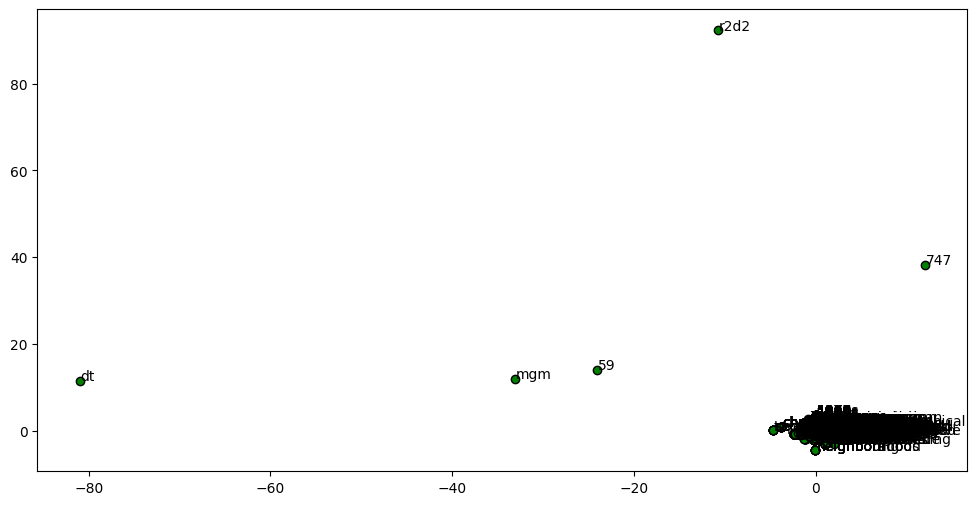

In [32]:
# # visualize embeddings
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# ft_model.wv is the part of the model that stores word vectors
words = ft_model.wv.index_to_key #  retrieves the list of words learned by  FastText model during training.
wvs = ft_model.wv[words] #extracts the word vectors for the list of words.

tsne = TSNE(n_components=2, random_state=42, max_iter=250, perplexity=5)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='green', edgecolors='k')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+0.1, y+0.1), xytext=(0, 0), textcoords='offset points')

## 2.3 Generate document-level embeddings - get the Matrix

Word embedding models give us an embedding for each word, how can we use it for downstream ML\DL tasks? one way is to flatten it or use sequential models. A simpler approach is to average all word embeddings for words in a document and generate a fixed-length document level emebdding 词嵌入模型为我们提供了每个词的嵌入，我们如何将它用于下游 ML\DL 任务？一种方法是将其扁平化或使用顺序模型。一种更简单的方法是对文档中单词的所有单词嵌入进行平均，并生成固定长度的文档级 emebdding

- The Averaged Word2Vec Vectorizer
   - it is a technique for converting text documents (such as sentences, paragraphs, or entire documents) into fixed-size word embeddings;
   - This approach can be particularly useful for document-level tasks such as classification or clustering, where each document is treated as a single instance and the variability in the length of documents does not matter.

- The average_word_vectors approach
   - is a simple technique to generate fixed-length document embeddings by averaging the word vectors (embeddings) of all the words in a document.
   - This is particularly useful in text classification or other document-level tasks where you need a fixed-size representation of variable-length text.

In [33]:
def averaged_word2vec_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index_to_key)

    def average_word_vectors(words, model, vocabulary, num_features):
        feature_vector = np.zeros((num_features,), dtype="float64")
        nwords = 0.

        for word in words:
            if word in vocabulary:
                nwords = nwords + 1.
                feature_vector = np.add(feature_vector, model.wv[word])
        if nwords:
            feature_vector = np.divide(feature_vector, nwords)

        return feature_vector

    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)

In [34]:
# get document level embeddings
ft_doc_features = averaged_word2vec_vectorizer(corpus=tokenized_corpus,
                                              model=ft_model,
                                              num_features=feature_size)
pd.DataFrame(ft_doc_features)

# 4800 words
# each words has 300 features/ each word is a vector of 300 elements

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-1.239160,0.750995,-0.781534,-0.250453,-0.875049,-0.507291,0.760150,0.774056,-0.559464,0.300515,...,-0.650758,-0.181640,0.051002,-0.503001,0.201260,-1.182832,0.397529,0.548296,-0.410327,0.850402
1,-0.270522,-0.156235,0.166268,-0.398164,0.329168,-0.281756,-0.335911,-0.942438,-0.226547,1.436252,...,-0.381297,-0.170993,0.081746,-0.557016,-0.998714,-0.480943,-0.935918,-0.188113,0.846824,1.122785
2,0.513539,0.114966,-0.294634,-0.061488,0.537985,-0.225254,-0.540273,0.295033,-0.031355,-0.007712,...,0.082315,-1.369395,0.771317,-0.686575,-0.036373,-0.122394,-0.395760,-0.377830,0.173537,-0.562683
3,1.063757,0.297124,0.288658,-0.776003,0.188191,1.019834,-0.861176,-0.940079,0.422407,0.242135,...,-0.151242,-0.189022,0.909559,0.219607,-0.296278,-0.170260,0.057021,0.267697,0.342968,-0.307482
4,0.150034,0.271165,-0.771289,0.380585,-0.010906,0.259229,-0.511195,-0.171226,-0.005192,0.916257,...,-0.379377,0.219099,0.716948,-0.132423,-0.507590,-0.033976,-0.267796,0.034939,0.254998,0.602516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,-0.037936,-0.322362,-0.318896,0.896827,0.811543,-0.160576,-0.567668,-1.497868,0.639160,-0.104422,...,-0.472394,-0.305598,0.165197,0.042499,0.264022,-0.355798,-0.420693,0.056187,-1.459985,-0.597020
4796,-0.016874,-0.128939,-0.127962,0.312805,0.551901,0.124589,-0.112808,-0.434756,-0.095820,-0.262559,...,0.560682,-0.247026,0.399749,-0.147409,-0.012443,-0.648629,-0.186198,-0.333480,0.831315,0.260570
4797,-0.228099,0.233963,-0.669089,-0.412051,0.356657,0.274307,0.169206,0.106816,-0.671787,-1.018211,...,-1.549270,0.770487,0.533315,-0.047904,0.093548,-0.095997,-1.109247,-0.788742,-0.039627,-0.202883
4798,-0.186634,0.106285,-2.223239,0.414631,-1.618463,-0.802087,-0.588736,-0.674829,-0.604989,0.763875,...,0.617253,-0.540471,-0.538332,-0.308694,-0.449206,0.179595,0.237285,0.855115,0.852049,-0.056991


## 2.4 Build Movie Recommendations

We will leverage cosine similarity again to generate recommendations

In [36]:
from sklearn.metrics.pairwise import cosine_similarity

In [37]:
doc_sim = cosine_similarity(ft_doc_features)
doc_sim_df = pd.DataFrame(doc_sim, index = df.index, columns = df.index)
doc_sim_df.head(10)

,546,95,788,94,127,28,199,82,200,88,...,4589,4487,4721,4305,4509,4625,4118,4727,3361,4553
546,1.000000,-0.062284,-0.081926,-0.086221,0.040041,0.094493,0.037849,-0.063146,-0.009519,0.214620,...,0.159782,-0.001955,0.199629,0.175922,-0.059549,0.100010,0.033825,0.026988,0.139164,0.107033
95,-0.062284,1.000000,0.299472,0.103688,0.262039,0.127282,0.047829,0.345790,0.030267,0.139042,...,-0.010152,-0.064136,0.147319,-0.040132,0.067589,-0.067192,-0.103591,-0.065678,-0.004852,0.105329
788,-0.081926,0.299472,1.000000,0.164806,0.214342,-0.009414,-0.030102,0.138711,0.118819,0.100984,...,0.042625,-0.022506,-0.034085,-0.114354,0.084272,-0.021818,0.171601,0.058016,0.111191,0.065878
94,-0.086221,0.103688,0.164806,1.000000,0.076399,0.250239,-0.155029,-0.008679,0.047645,0.033998,...,-0.006922,0.247896,-0.007649,-0.033551,0.256702,0.043220,0.109031,0.014519,-0.030989,0.031193
127,0.040041,0.262039,0.214342,0.076399,1.000000,-0.145115,0.010253,0.234722,0.022549,-0.074356,...,0.192074,0.138682,0.176660,-0.139203,0.238648,-0.102479,0.363699,-0.002139,0.431550,0.244641
28,0.094493,0.127282,-0.009414,0.250239,-0.145115,1.000000,0.004197,-0.200118,0.036671,0.062519,...,-0.091561,0.140418,-0.028110,0.050115,-0.020591,0.096146,-0.295022,-0.066488,-0.065727,-0.100340
199,0.037849,0.047829,-0.030102,-0.155029,0.010253,0.004197,1.000000,-0.015338,-0.032540,0.115316,...,0.078977,-0.001559,-0.061979,0.122370,0.015770,-0.165425,-0.027939,0.025586,-0.193997,-0.237564
82,-0.063146,0.345790,0.138711,-0.008679,0.234722,-0.200118,-0.015338,1.000000,-0.003608,0.177791,...,0.008555,0.026660,-0.032836,-0.030247,0.049617,0.015388,0.124302,0.142714,0.096009,0.249137
200,-0.009519,0.030267,0.118819,0.047645,0.022549,0.036671,-0.032540,-0.003608,1.000000,0.072262,...,-0.253714,-0.152458,0.014199,-0.187535,-0.000640,-0.007538,0.138409,0.064954,-0.036833,-0.000013
88,0.214620,0.139042,0.100984,0.033998,-0.074356,0.062519,0.115316,0.177791,0.072262,1.000000,...,-0.024905,-0.133573,0.028084,0.268954,-0.181637,0.115783,-0.084935,0.187650,-0.174336,0.022599


In [39]:
movies_list = df['title'].values
movies_list, movies_list.shape

(array(['Minions', 'Interstellar', 'Deadpool', ..., 'Penitentiary',
        'Alien Zone', 'America Is Still the Place'], dtype=object),
 (4800,))

In [40]:
popular_movies = ['Minions', 'Interstellar', 'Deadpool', 'Jurassic World', 'Pirates of the Caribbean: The Curse of the Black Pearl',
              'Dawn of the Planet of the Apes', 'The Hunger Games: Mockingjay - Part 1', 'Terminator Genisys',
              'Captain America: Civil War', 'The Dark Knight', 'The Martian', 'Batman v Superman: Dawn of Justice',
              'Pulp Fiction', 'The Godfather', 'The Shawshank Redemption', 'The Lord of the Rings: The Fellowship of the Ring',
              'Harry Potter and the Chamber of Secrets', 'Star Wars', 'The Hobbit: The Battle of the Five Armies',
              'Iron Man']

In [42]:
def movie_recommender(movie_title, movies=movies_list, doc_sims=doc_sim_df):
    # find movie id
    # to find the index of movie_title in movie_list.
    # [0][0]: The first [0] selects the array of indices (since np.where returns a tuple).
    # The second [0] selects the first element from that array.
    movie_idx = np.where(movies == movie_title)[0][0]
    # get movie similarities
    movie_similarities = doc_sims.iloc[movie_idx].values
    # get top 5 similar movie IDs
    similar_movie_idxs = np.argsort(-movie_similarities)[1:6]
    # get top 5 movies
    similar_movies = movies[similar_movie_idxs]
    # return the top 5 movies
    return similar_movies

In [43]:
for movie in popular_movies:
    print('Movie:', movie)
    print('Top 5 recommended Movies:', movie_recommender(movie_title=movie, movies=movies_list, doc_sims=doc_sim_df))
    print()

Movie: Minions
Top 5 recommended Movies: ['Teenage Mutant Ninja Turtles: Out of the Shadows' 'Home on the Range'
 'Central Intelligence' 'Paul Blart: Mall Cop' 'G-Force']

Movie: Interstellar
Top 5 recommended Movies: ['Gattaca' 'The Day the Earth Stood Still' 'The Inhabited Island'
 'Space Battleship Yamato' 'The Cave']

Movie: Deadpool
Top 5 recommended Movies: ['Lucy' 'Standard Operating Procedure' 'Fantastic Four' 'Iron Man 2'
 'The Andromeda Strain']

Movie: Jurassic World
Top 5 recommended Movies: ['Jurassic Park' 'The Lost World: Jurassic Park' 'Paul' 'Scooby-Doo'
 'Walking With Dinosaurs']

Movie: Pirates of the Caribbean: The Curse of the Black Pearl
Top 5 recommended Movies: ['Jungle Shuffle' 'American Ninja 2: The Confrontation' 'The Holy Girl'
 'Tycoon' 'The Pirate']

Movie: Dawn of the Planet of the Apes
Top 5 recommended Movies: ['Battle for the Planet of the Apes' 'Buried' 'The Inhabited Island'
 'U.F.O.' 'Final Destination 5']

Movie: The Hunger Games: Mockingjay - Part